In [50]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# import Ml libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


In [59]:
# Read the data
df = pd.read_csv('D:\working data.csv')
df_1 = df[["TotalCharges","MonthlyCharges","tenure"]] 
df_1.head()

,TotalCharges,MonthlyCharges,tenure
0,29.85,29.85,1
1,1889.5,56.95,34
2,108.15,53.85,2
3,1840.75,42.30,45
4,151.65,70.70,2


In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TotalCharges    7043 non-null   object 
 1   MonthlyCharges  7043 non-null   float64
 2   tenure          7043 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [35]:
# check duplicates
df_1.duplicated().sum()

0

In [34]:
# Assuming df_1 is your DataFrame
df_1 = df_1.copy()  # Make a copy to avoid SettingWithCopyWarning
df_1.drop_duplicates(inplace=True)


In [30]:
df_1.isnull().sum().sort_values(ascending=False)

TotalCharges      0
MonthlyCharges    0
tenure            0
dtype: int64

In [60]:

# split the data
X = df_1.drop(['TotalCharges'], axis=1)
Y = df_1['TotalCharges']

# encode the data
le = LabelEncoder()
X['MonthlyCharges'] = le.fit_transform(X['MonthlyCharges'])
X['tenure'] = le.fit_transform(X['tenure'])
Y = le.fit_transform(Y)

# split the data into train and test
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 , random_state = 42)

# Call the model
model = LinearRegression()



In [62]:
%%time
# fit the model
model.fit(X_train,Y_train)

# predict the model
Y_pred = model.predict(X_test)

# check the accuracy
print("R2 score is : ",r2_score(Y_test,Y_pred))
print("MSE is : ",mean_squared_error(Y_test,Y_pred))
print("MAE is : ",mean_absolute_error(Y_test,Y_pred))

# print accuracy
print("Accuracy is : ",model.score(X_test,Y_test))


R2 score is :  0.09693569003073177
MSE is :  3251647.021519039
MAE is :  1516.0976377274046
Accuracy is :  0.09693569003073177
CPU times: total: 0 ns
Wall time: 9.66 ms


In [44]:
decimal_accuracy = 0.08548490303529666

# Convert to percentage
percentage_accuracy = decimal_accuracy * 100

# Display the result
print(f"The accuracy score as a percentage is: {percentage_accuracy:.2f}%")


The accuracy score as a percentage is: 8.55%


In [63]:
model.predict([[0,1]])

c:\Users\Ali BaBa\.conda\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2350.36729547])

In [48]:
# # encode the target variable
Y = le.fit_transform(Y)

# XGB classifier

In [51]:
# XGB Classifier
model = XGBRegressor()
# fit the model
model.fit(X_train,Y_train)
# predict the model
Y_pred = model.predict(X_test)
# check the accuracy
print("Accuracy is : ",model.score(X_test,Y_test))


Accuracy is :  0.7640789599547306


# 02. Support vector Machine

In [90]:
# import libraries for support vector machine
from sklearn.svm import SVR,SVC
from sklearn.metrics import classification_report, confusion_matrix


In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
# encode the data using for loop
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])           




In [102]:
# split the data into x and y
x = df.drop(['gender'], axis=1)
y = df['gender']

# split the data into train and test
X_train,X_test,Y_train,Y_test =train_test_split(x,y,test_size=0.2 , random_state = 42)

# Call the model
model = SVC()

# fit the model
model.fit(X_train,Y_train)

# predict the model
Y_pred = model.predict(X_test)



In [103]:
%%time
#  Evalute the model
print("Accuracy is : ",model.score(X_test,Y_test))
print("Confusion matrix is :\n ",confusion_matrix(Y_test,Y_pred))
print("Classification report is : \n",classification_report(Y_test,Y_pred))




Accuracy is :  0.47977288857345635
Confusion matrix is :
  [[ 28 713]
 [ 20 648]]
Classification report is : 
               precision    recall  f1-score   support

           0       0.58      0.04      0.07       741
           1       0.48      0.97      0.64       668

    accuracy                           0.48      1409
   macro avg       0.53      0.50      0.35      1409
weighted avg       0.53      0.48      0.34      1409

CPU times: total: 1.88 s
Wall time: 2.14 s


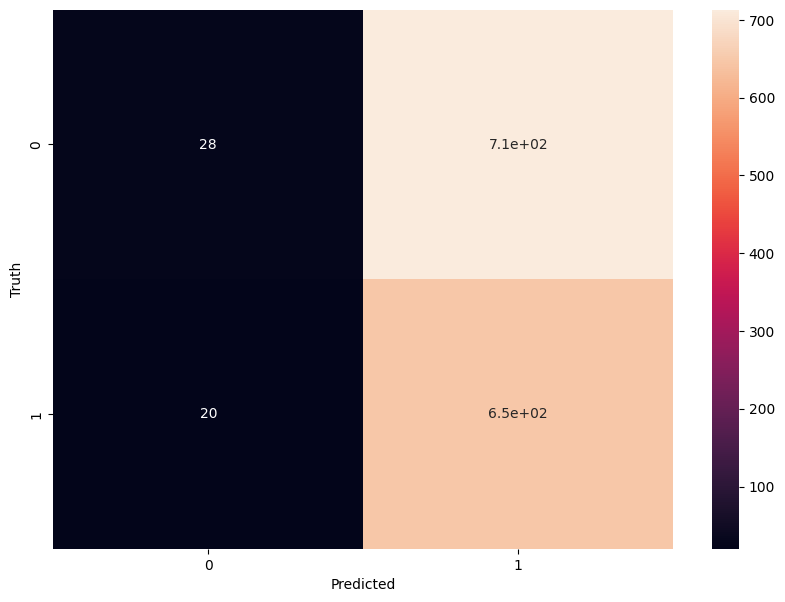

In [104]:
# Draw heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()